# <center> Telecom Churn Prediction

## Libraries and Data Loading

### Importing Libraires

In [187]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
sns.set(style="white")

import os

### Load Data

In [188]:
data_path=os.path.join(os.getcwd(),"data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [189]:
data_origin=pd.read_csv(data_path)

In [190]:
data_origin.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [191]:
data_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [192]:
data_origin.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [193]:
#checking the data type of the columns
data_origin.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [194]:
#converting the total charge column to numerical data type
data=data_origin
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [195]:
#remove missing values
data.dropna(inplace=True)
#remove custumer IDs from the data set 
data=data.iloc[:,1:]

#converting the target variable into binary numeric variable
data['Churn'].replace(['No','Yes'],[0,1],inplace=True)
#Let's convert all the categorical variables into dummy variables
data_dummies=pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot: >

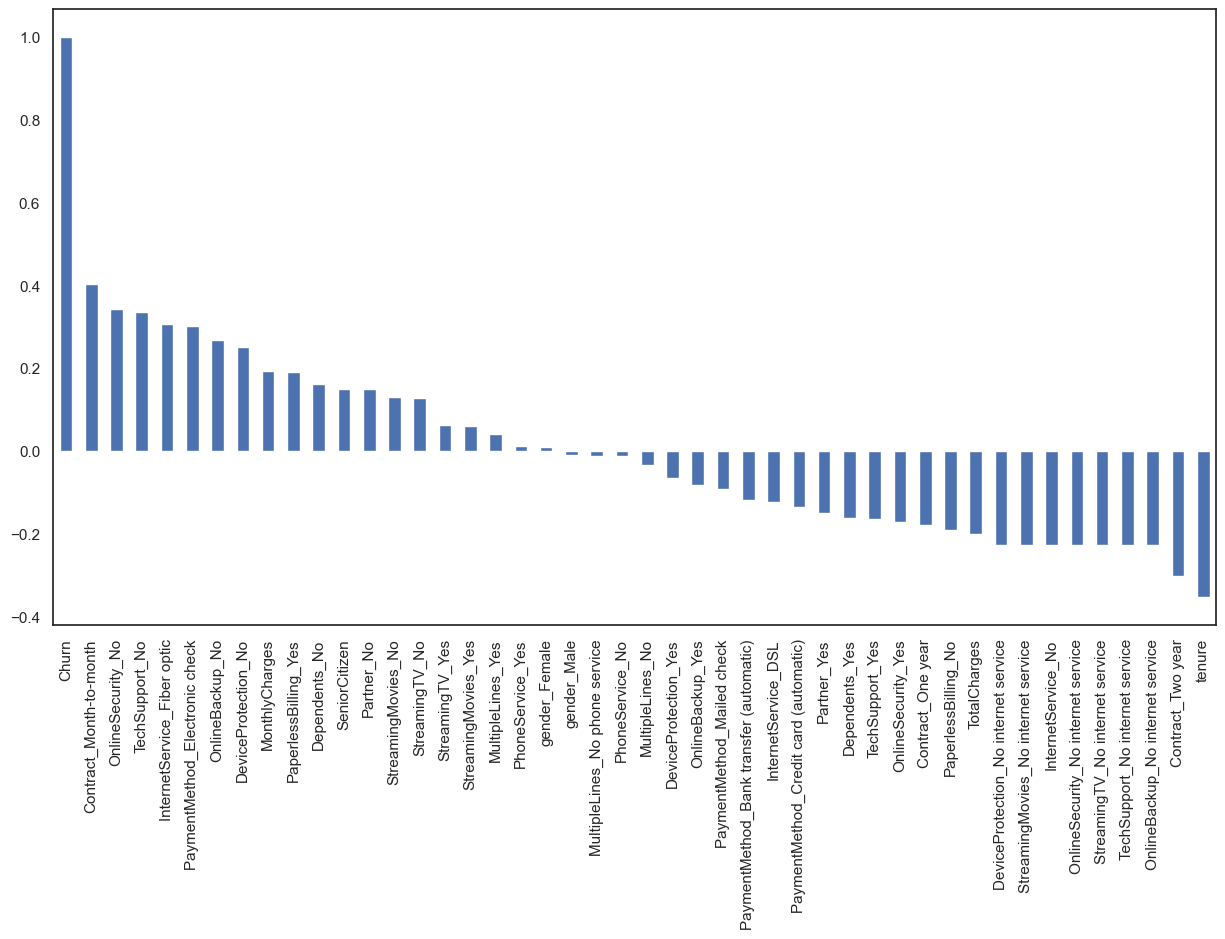

In [196]:
#Get Correlation of "Churn" with other variables
plt.figure(figsize=(15,8))
data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

## Data Exploration
Let's explore the data in order to figure out the patterns, and form some hypothesis. First, we will look at each individual variables and then slice the data for any interesting trends.

#### A.) Demographics 

Let us first understand the gender, age range, patern and dependent status of the customers

##### Gender Distribution

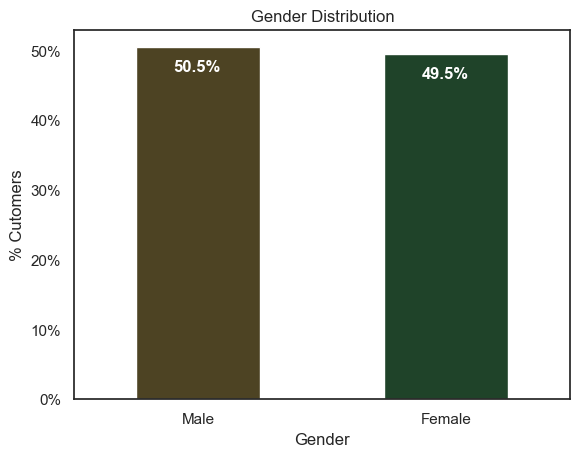

In [197]:
ax=(data['gender'].value_counts()*100/len(data)).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=['#4D4323','#1F4329']
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Cutomers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# set individual bar lables using above list

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

In the data, the percent of male is quit higher than the percent of female

##### %Senior Citizens

Text(0.5, 1.0, '% of Senior Citizens')

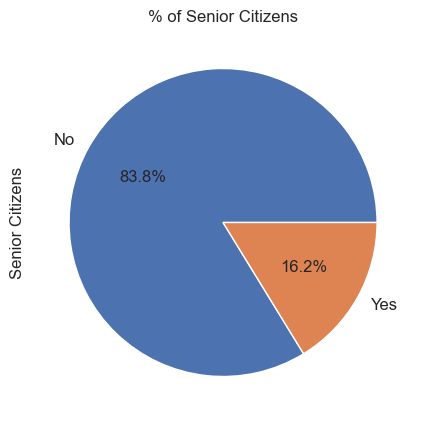

In [198]:
ax=(data['SeniorCitizen'].value_counts()*100/len(data)).plot.pie(
    autopct='%.1f%%',
    labels = ['No', 'Yes'],
    figsize =(5,5),
    fontsize = 12
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize=12)
ax.set_title('% of Senior Citizens',fontsize=12)

##### Partner and dependent status

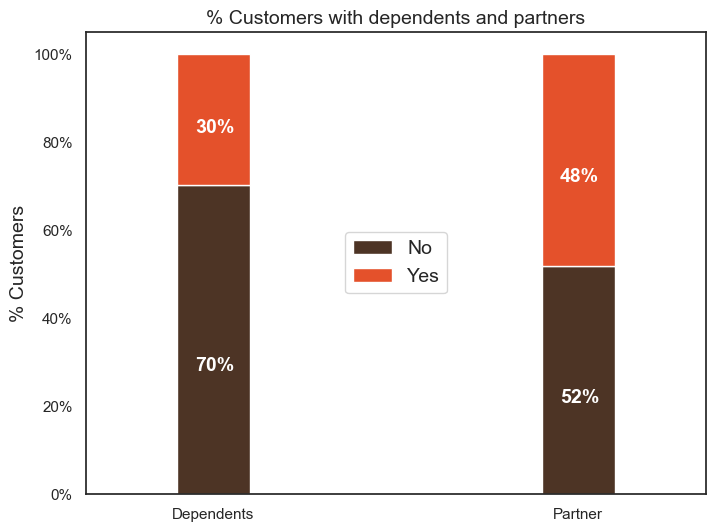

In [199]:
colors= ['#4D3425','#E4512B']
df2 = pd.melt(data_origin, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(data_origin)
colors =colors
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

The percent of costumer that have partner is quit equal to the ones whithout partner. However, the percent of custumers with dependents is lower that the custumors without dependents.
Let's explore the percent of custulers with partners and dependents. It will be more significant.


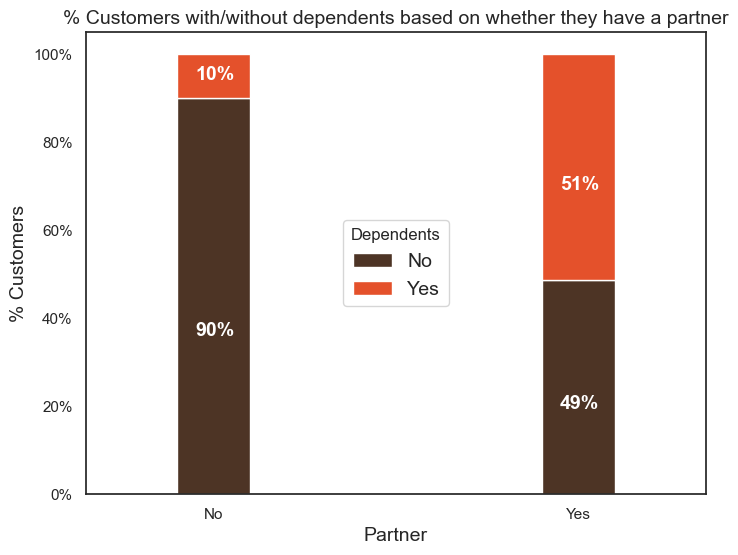

In [200]:
colors = ['#4D3425','#E4512B']
partner_dependents = data_origin.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Custulers who have neither partner nor dependents is very high almost the 80%

### B.) Customer Account Information

##### Tenure

C:\Users\hafsa\AppData\Local\Temp\ipykernel_32052\4060105518.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['tenure'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their tenure')

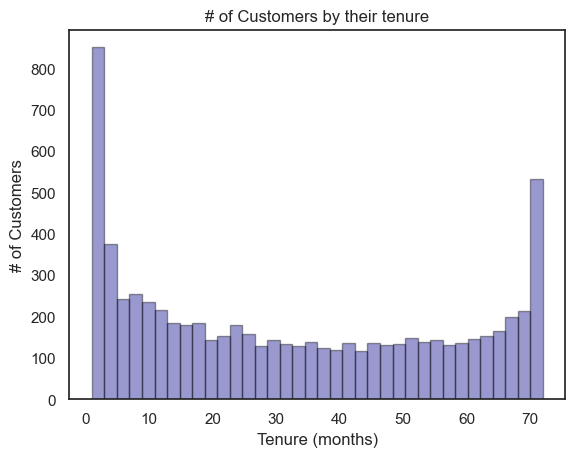

In [201]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

The histogram above shows that the 72 months tenure has higher number of custumer after one month tenure. It can be due to the different in the contracts that makes the custumers stay/leave the company harder/easier.

##### Contracts

Text(0.5, 1.0, '# of Custumers by Contract Type')

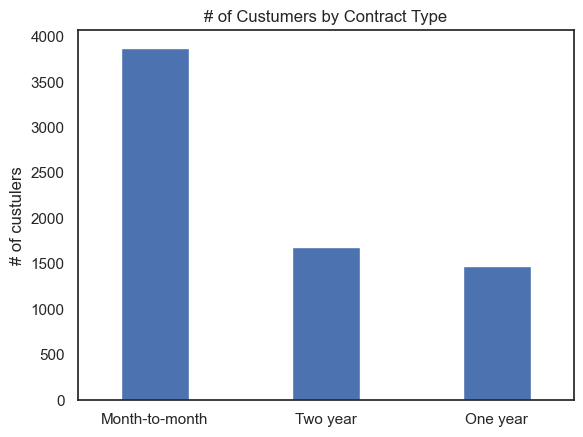

In [202]:
ax=data['Contract'].value_counts().plot(kind='bar',rot=0,width=0.4)
ax.set_ylabel('# of custulers')
ax.set_title('# of Custumers by Contract Type')

As we can see in the plot above lot of costumers are in the month-to-month contract. While the One-year and two-year have quit the same number of custumers

C:\Users\hafsa\AppData\Local\Temp\ipykernel_32052\435576459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
C:\Users\hafsa\AppData\Local\Temp\ipykernel_32052\435576459.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[data

Text(0.5, 1.0, 'Two Year Contract')

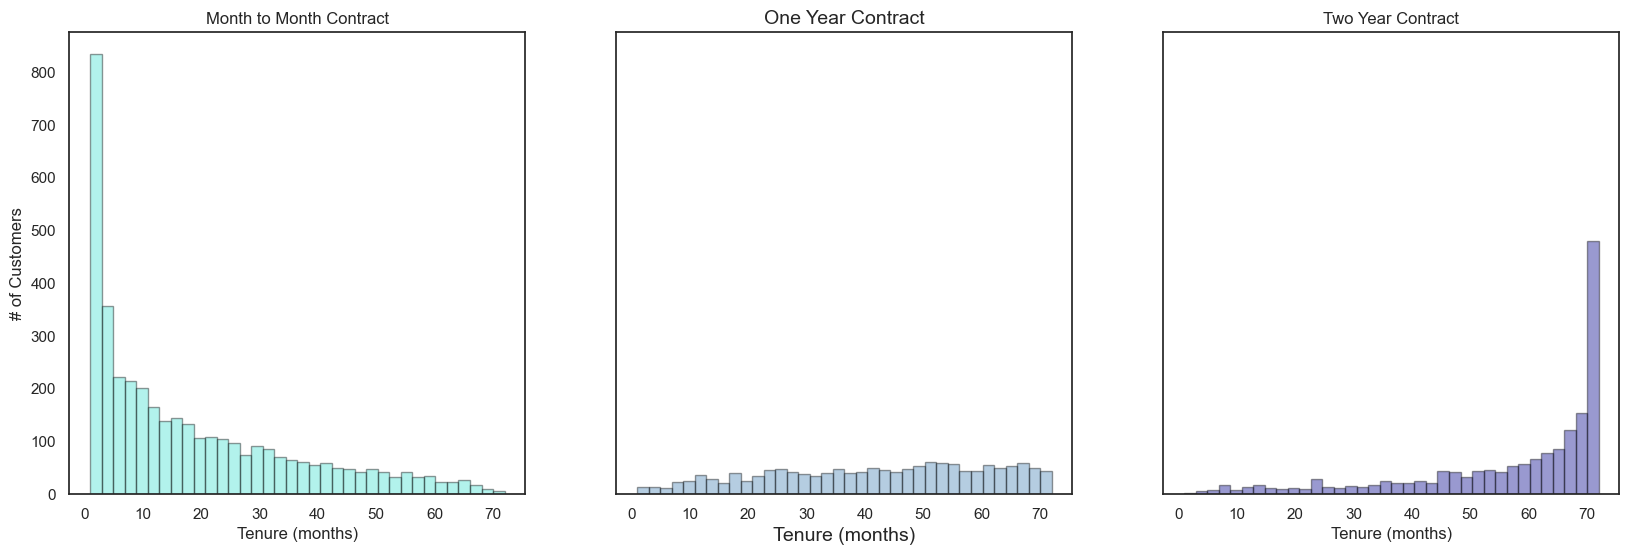

In [203]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

These is actually accurate with what saw in the correlation with churn earlier.

### C.) Services Used By Customers

In [204]:
data.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

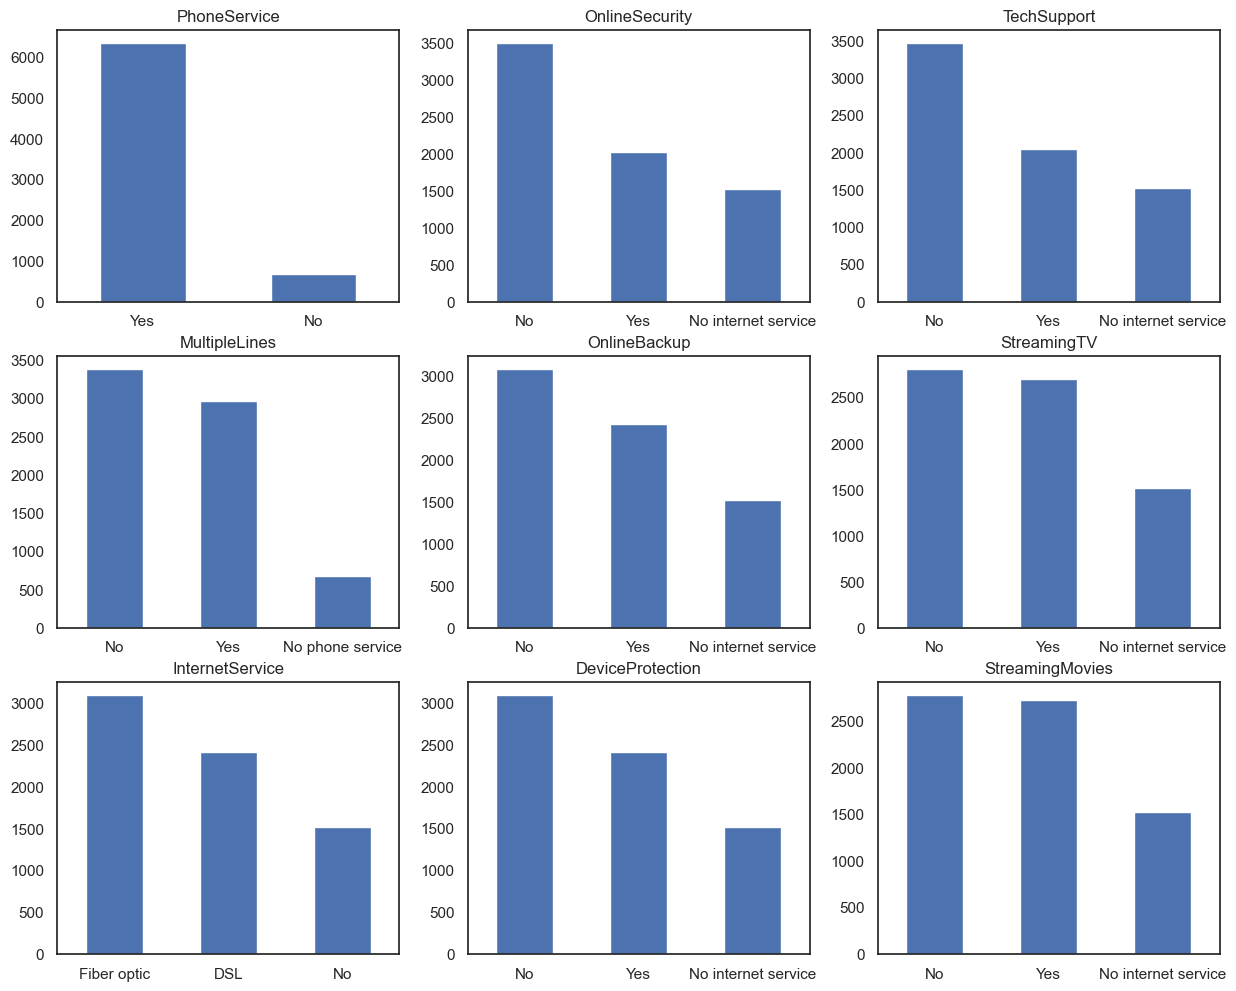

In [205]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig ,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,12))
for i, item in enumerate(services):
    if i<3:
        ax=data[item].value_counts().plot(kind='bar',ax=axes[i,0],rot=0)
    elif i>=3 and i<6:
        ax=data[item].value_counts().plot(kind='bar',ax=axes[i-3,1],rot=0)
    elif i<9:
        ax=data[item].value_counts().plot(kind='bar',ax=axes[i-6,2],rot=0)
    ax.set_title(item)

### D.) Monthly and Total charges

<AxesSubplot: xlabel='MonthlyCharges', ylabel='TotalCharges'>

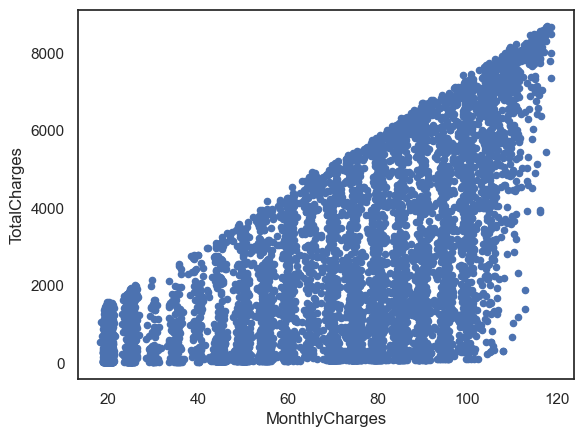

In [206]:
data[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

The total charges increase with the monthly charges of the cutumers

### E.) The interaction between the Churn and the important variables

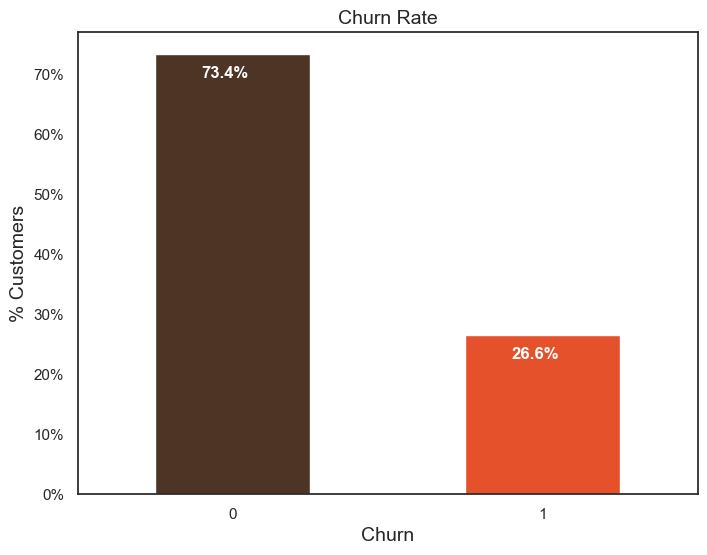

In [207]:
ax=(data['Churn'].value_counts()*100/len(data)).plot(kind='bar',
                                                     stacked=True,
                                                     rot=0,
                                                     color=colors,
                                                     figsize=(8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size=14)
ax.set_xlabel('Churn',size=14)
ax.set_title('Churn Rate',size=14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0,str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold',
           )


In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

i.) Churn Vs Tenure


<AxesSubplot: xlabel='Churn', ylabel='tenure'>

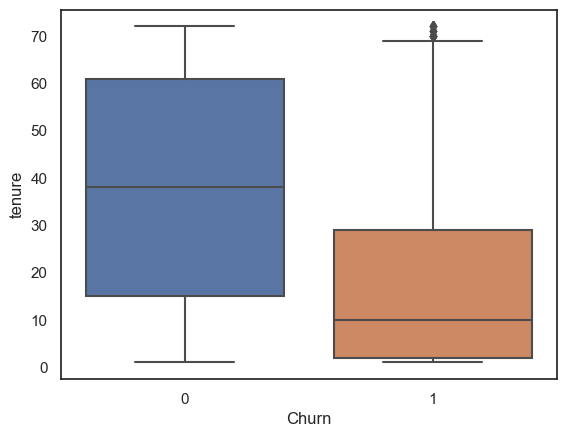

In [208]:
sns.boxplot(x = data.Churn, y = data.tenure)

As we can see the custumer who donnot churn tend to stay with the company with a longer tenure

ii.) Churn by Contract Type

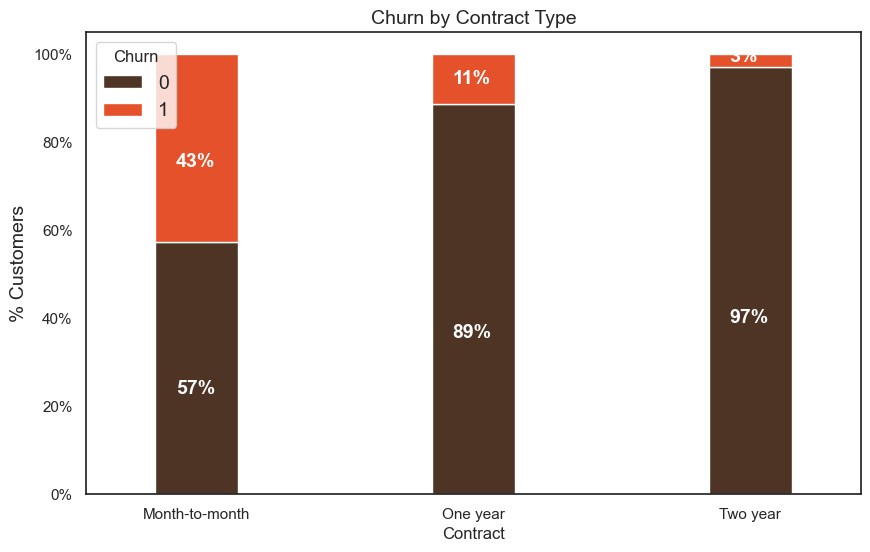

In [209]:
colors = ['#4D3425','#E4512B']
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Custumers with month-to-month contract tend to churn mostly

iii.) Churn by Seniorrty

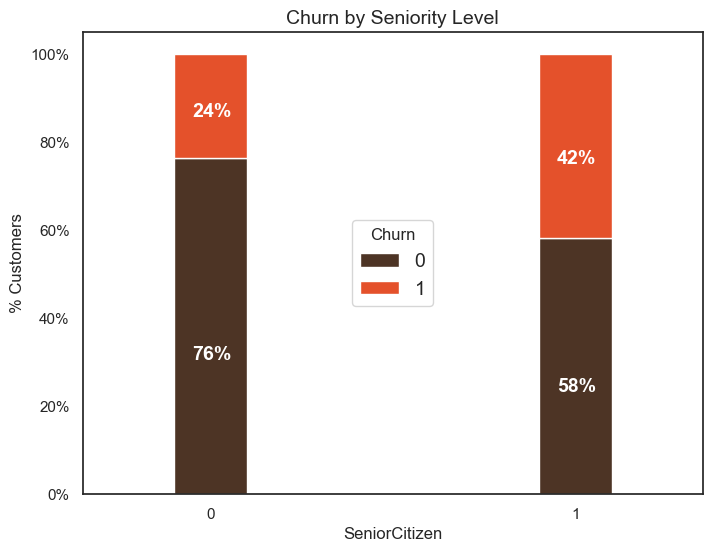

In [210]:
colors = ['#4D3425','#E4512B']
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)


Senior Citizens have almost double the churn rate than younger population.

iv.) Churn by Monthly Charges 

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

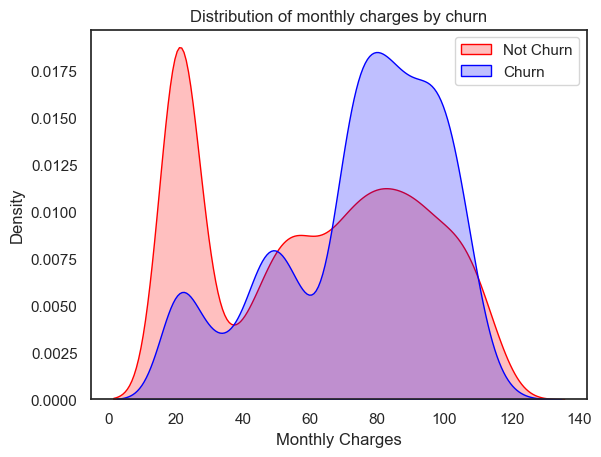

In [211]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 0) ],
                color="Red", fill = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 1) ],
                ax =ax, color="Blue", fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Higher % of customers churn when the monthly charges are high

v.) Churn by Total Charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

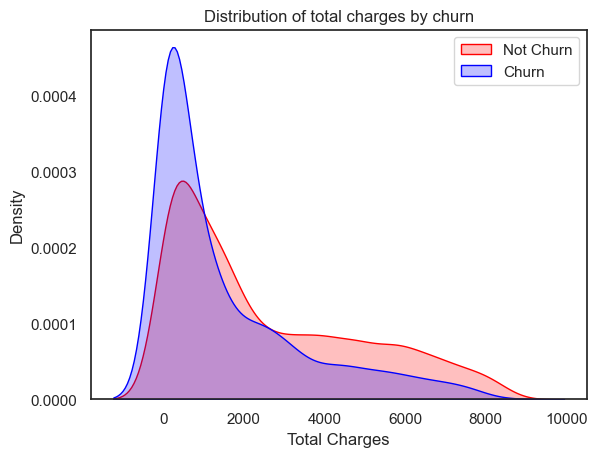

In [212]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 0) ],
                color="Red", fill = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 1) ],
                ax =ax, color="Blue", fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

It seems that there is higer churn when the total charges are lower.

## Predictive Models

### Logistic Regression

We will use the data where we create the dumies

In [213]:
y=data_dummies['Churn']
X=data_dummies.drop(columns=['Churn'])

#WE will sciketLearn 
from sklearn.preprocessing import MinMaxScaler
#features=X.columns.values
scaler=MinMaxScaler()

scaler.fit(X)
X=pd.DataFrame(scaler.transform(X),columns=X.columns)
#X.columns=features

The Feature scaling is important in Linear Regression as well as in other machine learning algorithm

In [214]:
#create the training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [215]:
#Running the logistic Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model=model.fit(X_train,y_train)

c:\Users\hafsa\anaconda3\envs\Prediction\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [216]:
model

LogisticRegression()

In [217]:
from sklearn import metrics
prediction_test=model.predict(X_test)
#print the prediction accuracey
print(metrics.accuracy_score(y_test,prediction_test))

0.795734597156398


AxesSubplot(0.125,0.11;0.775x0.77)


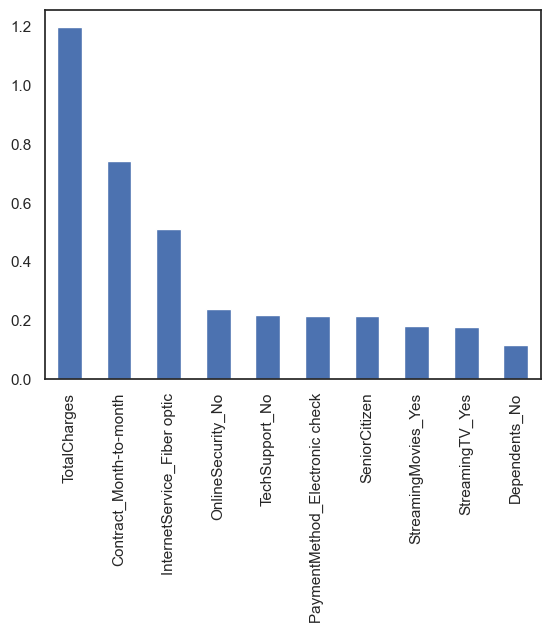

In [218]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

the accuracy of the model using Logistic regression is 79,57% 

AxesSubplot(0.125,0.11;0.775x0.77)


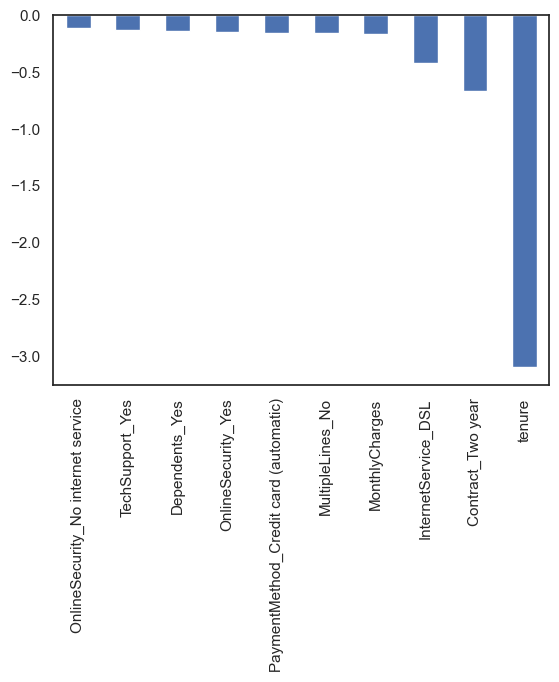

In [219]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

##### Observations : 
Some variables have negative relationship with the target (Churn), While others have positive ones : 
* As we saw in EDA, having the month-to-month contract increase the chance of churn. While, the 2-year contract reduce the chance of a custumer'churn.
* having the DSL services reduce also the chance to churn.
* Total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.

### Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier
X_train_rf,X_test_rf,y_train_rf,y_test_rf=train_test_split(X,y,test_size=0.2,random_state=41)
model_rf=RandomForestClassifier(n_estimators=1000,oob_score=True,n_jobs=-1,random_state=50,max_features="auto",max_leaf_nodes=30)
model_rf.fit(X_train_rf,y_train_rf)
#Prediction
prediction_test_rf=model_rf.predict(X_test_rf)



c:\Users\hafsa\anaconda3\envs\Prediction\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [221]:
print(metrics.accuracy_score(y_test_rf,prediction_test_rf))

0.7853589196872779


<AxesSubplot: >

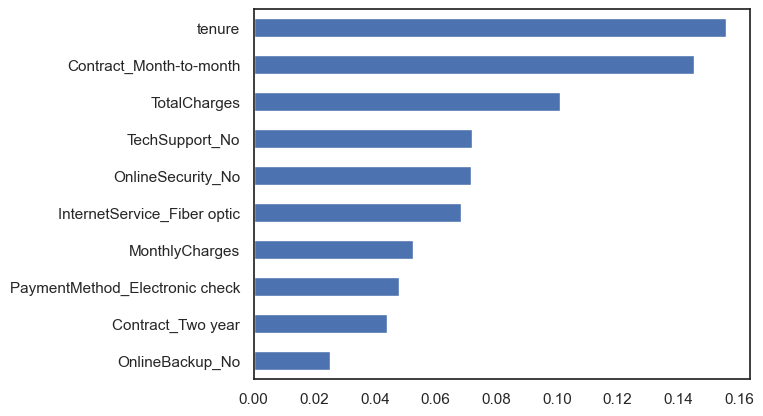

In [222]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

##### Observations
* From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
* The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

### Support Vector Machine (SVM)


In [223]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=99)

In [224]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear') 
model_svm.fit(X_train,y_train)
preds_svm = model_svm.predict(X_test_svm)
metrics.accuracy_score(y_test_svm, preds_svm)

0.8208955223880597

In [225]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test_svm,preds_svm))  

[[951  91]
 [161 204]]


With SVM the accuracy increase up to 82%. However, we need to take a deeper look at the true positive and true negative rates, including the Area Under the Curve (AUC) for a better prediction.

### ADA Boost

In [226]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model_ada.fit(X_train,y_train)
preds = model_ada.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7909952606635071

The SVM model is the winner for all the models that we have tried with the accuracy of 82%